In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


# Steps

## 0. Preprocess + EDA + Feature Selection
## 1. Extract input and output cols
## 2. Scale the values
## 3. Train test split
## 4. Train the model
## 5. Evaluate the model/model selection
## 6. Delpoy the model


In [5]:
# 0. Preprocess + EDA + Feature Selection
# Preprocess
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [6]:
import matplotlib.pyplot as plt

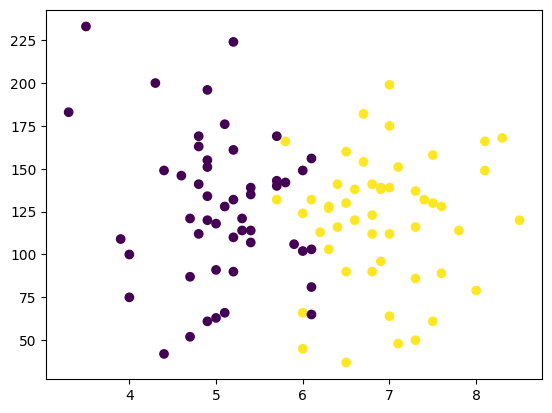

In [7]:
# EDA
plt.scatter(df['cgpa'],df["iq"],c=df["placement"])

In [8]:
# 1. Extract input and output cols
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [10]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [11]:
# 3. Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [12]:
# 2. Scale the values
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_train

array([[-0.77465633,  1.37245836],
       [ 0.97707909, -1.91049852],
       [ 1.5901865 , -0.21772388],
       [-0.51189602, -0.39726058],
       [ 0.71431878,  0.01310903],
       [ 0.88949232,  0.42347864],
       [-0.59948279, -0.21772388],
       [-0.94982988,  0.29523814],
       [ 0.45155847,  0.19264573],
       [ 1.76536004, -1.1154074 ],
       [ 0.71431878, -0.83327829],
       [ 0.45155847,  0.96208875],
       [ 0.36397169,  0.47477484],
       [ 1.85294681,  0.67995964],
       [ 0.10121138, -1.47448081],
       [-1.12500342, -0.91022259],
       [-2.35121822,  1.55199507],
       [ 0.88949232, -0.26902008],
       [ 1.85294681,  1.11597736],
       [ 1.15225264, -1.85920231],
       [-2.17604468,  2.8344001 ],
       [-0.59948279, -0.03818717],
       [-1.82569759, -0.34596438],
       [ 0.88949232,  1.34681026],
       [-0.51189602,  0.32088624],
       [-0.94982988, -0.06383527],
       [ 1.32742618,  0.91079255],
       [ 0.36397169, -0.16642768],
       [ 0.27638492,

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_test

array([[ 0.01362461, -1.98744282],
       [ 0.80190555, -0.67938969],
       [-0.16154893,  0.50042294],
       [ 0.10121138, -0.49985298],
       [-1.47535051,  1.98801278],
       [-0.94982988,  1.88542037],
       [ 0.80190555,  0.42347864],
       [ 0.27638492,  0.11570143],
       [-0.86224311, -0.11513147],
       [ 2.02812035,  1.16727356]])

In [18]:
# 4. Train the model
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()

In [20]:
# Model Training
clf.fit(X_train,y_train)

LogisticRegression()

In [21]:
# 5. Evaluate the model/model selection
y_pred = clf.predict(X_test)

In [22]:
y_test

10    1
66    1
4     0
14    0
95    0
80    0
60    1
70    1
67    0
53    1
Name: placement, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [24]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

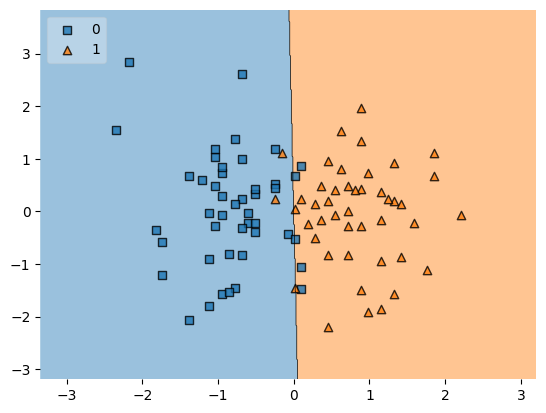

In [25]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [28]:
# 6. Delpoy the model
import pickle

In [29]:
pickle.dump(clf,open('model.pkl','wb'))